###  EDA
#### 1.1 labels 
- Multilabel classfication problem. For example, one photo contains both 'argriculture', 'partly_cloudy','water'tags
- Highly imbalanced (Most tags contains primary, while most tags appeared less than .05% of the photos)

Set tensorflow environment
```python
source activate tensorflow_p36
```

In [1]:
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
kaggle_path = '/home/ubuntu/.kaggle/competitions/planet-understanding-the-amazon-from-space/'
labels = pd.read_csv(kaggle_path+'train_v2.csv')

In [16]:
def plot_tag_distribution():
    texts = labels.tags.tolist()
    tokenizer = Tokenizer(filters='"(),./:~')
    tokenizer.fit_on_texts(texts)
    tags = tokenizer.word_docs
    fig  = plt.figure(figsize=(10, 6))
    tags = dict(sorted(tags.items(), key=lambda x: (-x[1], x[0])))
    plt.bar(tags.keys(), np.array(list(tags.values()))/sum(list(tags.values())), 1, color='lightblue')
    plt.xticks(rotation=90)
    plt.title('Tags distribution')
    plt.show()
    return tags

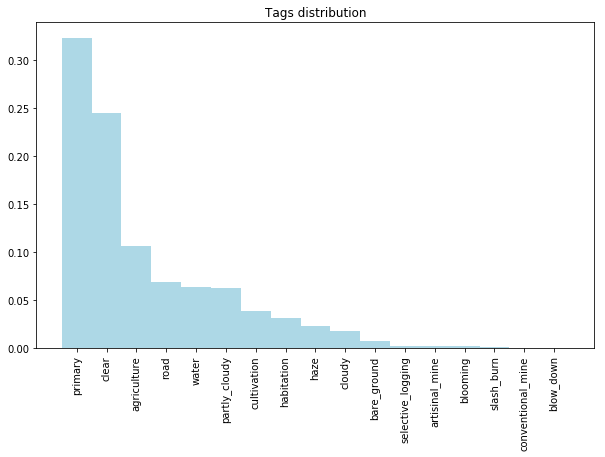

In [17]:
tags = plot_tag_distribution()

In [22]:
print ('haze vs clear ',tags['haze'],' : ',tags['clear'])
tags

haze vs clear  2697  :  28431


{'primary': 37513,
 'clear': 28431,
 'agriculture': 12315,
 'road': 8071,
 'water': 7411,
 'partly_cloudy': 7261,
 'cultivation': 4477,
 'habitation': 3660,
 'haze': 2697,
 'cloudy': 2089,
 'bare_ground': 862,
 'selective_logging': 340,
 'artisinal_mine': 339,
 'blooming': 332,
 'slash_burn': 209,
 'conventional_mine': 100,
 'blow_down': 98}

#### Examples of photos
Display 20 photos at random choice

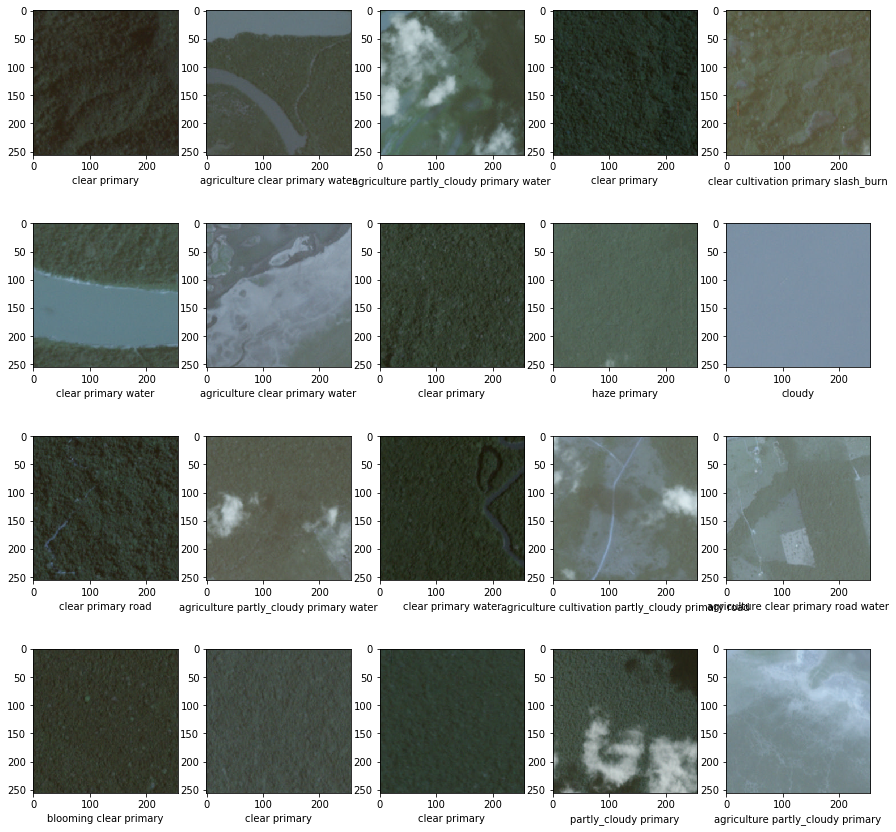

In [15]:
def display_photos(rows,columns):
    fig = plt.figure(figsize=(15, 15))
    for i in range(1, columns*rows +1):
        img_id = np.random.randint(20000)
        path = kaggle_path+f'train-jpg/train_{img_id}.jpg'
        img  = cv2.imread(path)
        ax = fig.add_subplot(rows, columns, i)
        ax.set_xlabel(labels.tags[img_id])
        plt.imshow(img)
    plt.show()
        
display_photos(rows=4,columns=5)